In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from scipy.io.arff import loadarff

In [2]:
data, meta = loadarff("seismic-bumps.arff");

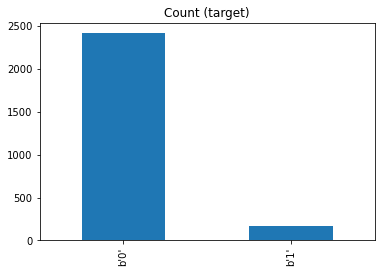

In [3]:
# Our data being very unbalanced and having a very few number of class 1 
# We will look at to oversampling after cleaning our data
df = pd.DataFrame(data);
df['class'].value_counts().plot(kind='bar', title='Count (target)');

In [4]:
print(meta) # Print Categories

Dataset: seismic-bumps
	seismic's type is nominal, range is ('a', 'b', 'c', 'd')
	seismoacoustic's type is nominal, range is ('a', 'b', 'c', 'd')
	shift's type is nominal, range is ('W', 'N')
	genergy's type is numeric
	gpuls's type is numeric
	gdenergy's type is numeric
	gdpuls's type is numeric
	ghazard's type is nominal, range is ('a', 'b', 'c', 'd')
	nbumps's type is numeric
	nbumps2's type is numeric
	nbumps3's type is numeric
	nbumps4's type is numeric
	nbumps5's type is numeric
	nbumps6's type is numeric
	nbumps7's type is numeric
	nbumps89's type is numeric
	energy's type is numeric
	maxenergy's type is numeric
	class's type is nominal, range is ('1', '0')



In [5]:
# Print types of each category
for category in data.dtype.names:
    print("category =", category, ", type = ", type(data[category][0]));

category = seismic , type =  <class 'numpy.bytes_'>
category = seismoacoustic , type =  <class 'numpy.bytes_'>
category = shift , type =  <class 'numpy.bytes_'>
category = genergy , type =  <class 'numpy.float64'>
category = gpuls , type =  <class 'numpy.float64'>
category = gdenergy , type =  <class 'numpy.float64'>
category = gdpuls , type =  <class 'numpy.float64'>
category = ghazard , type =  <class 'numpy.bytes_'>
category = nbumps , type =  <class 'numpy.float64'>
category = nbumps2 , type =  <class 'numpy.float64'>
category = nbumps3 , type =  <class 'numpy.float64'>
category = nbumps4 , type =  <class 'numpy.float64'>
category = nbumps5 , type =  <class 'numpy.float64'>
category = nbumps6 , type =  <class 'numpy.float64'>
category = nbumps7 , type =  <class 'numpy.float64'>
category = nbumps89 , type =  <class 'numpy.float64'>
category = energy , type =  <class 'numpy.float64'>
category = maxenergy , type =  <class 'numpy.float64'>
category = class , type =  <class 'numpy.bytes

### We have to convert nominal values to onehotencoded to use them in our classification

In [6]:
# Convert seismic to onehotencoded
encoded_seismic = pd.get_dummies(data['seismic'])
encoded_seismic.columns = ['seismic_a', 'seismic_b'];
print(encoded_seismic)

      seismic_a  seismic_b
0             1          0
1             1          0
2             1          0
3             1          0
4             1          0
...         ...        ...
2579          0          1
2580          0          1
2581          0          1
2582          1          0
2583          1          0

[2584 rows x 2 columns]


In [7]:
# Convert seismoacoustic to onehotencoded
encoded_seismoacoustic = pd.get_dummies(data['seismoacoustic'])
encoded_seismoacoustic.columns = ['seismoacoustic_a', 'seismoacoustic_b', 'seismoacoustic_c'];
print(encoded_seismoacoustic);

      seismoacoustic_a  seismoacoustic_b  seismoacoustic_c
0                    1                 0                 0
1                    1                 0                 0
2                    1                 0                 0
3                    1                 0                 0
4                    1                 0                 0
...                ...               ...               ...
2579                 1                 0                 0
2580                 1                 0                 0
2581                 1                 0                 0
2582                 1                 0                 0
2583                 1                 0                 0

[2584 rows x 3 columns]


In [8]:
# Convert shift to ones and zeros 0 for coal-getting, 1 for preparation shift);
dataframe = pd.DataFrame(data);
encoded_shift = dataframe['shift'].replace(b'W', 0);
encoded_shift = encoded_shift.replace(b'N', 1);
print(encoded_shift);

0       1
1       1
2       1
3       1
4       1
       ..
2579    0
2580    0
2581    0
2582    0
2583    0
Name: shift, Length: 2584, dtype: int64


In [9]:
# Convert ghazard to onehotencoded
encoded_ghazard = pd.get_dummies(data['ghazard'])
encoded_ghazard.columns = ['ghazard_a', 'ghazard_b', 'ghazard_c'];
print(encoded_ghazard);

      ghazard_a  ghazard_b  ghazard_c
0             1          0          0
1             1          0          0
2             1          0          0
3             1          0          0
4             1          0          0
...         ...        ...        ...
2579          0          1          0
2580          1          0          0
2581          1          0          0
2582          1          0          0
2583          1          0          0

[2584 rows x 3 columns]


In [10]:
# Create a dataframe of the original data
dataframe = pd.DataFrame(data)

# Remove all data that we encoded from the original dataframe
dataframe = dataframe.drop('seismic', axis=1);
dataframe = dataframe.drop('seismoacoustic', axis=1);
dataframe = dataframe.drop('shift', axis=1);
dataframe = dataframe.drop('ghazard', axis=1);
dataframe = dataframe.drop('class', axis=1); # Also drop class because it already has 0 and 1 values;

X = dataframe.to_numpy();

In [11]:
# Standardize data that we did not encode
X = StandardScaler().fit_transform(X);

In [12]:
X.shape

(2584, 14)

In [13]:
# recreate a dataframe with the Standardized data and add the encoded data
dataframe = pd.DataFrame(X)
dataframe = dataframe.join(encoded_seismic)
dataframe = dataframe.join(encoded_seismoacoustic)
dataframe = dataframe.join(encoded_ghazard)
dataframe = dataframe.join(encoded_shift);

In [14]:
dataframe.shape

(2584, 23)

In [15]:
print(X.shape)

(2584, 14)


In [16]:
# Separate the dataset into a training and a test set and keep the class included in the set
X = dataframe.copy()
X = X.join(df['class']).astype('int32');

X_train, X_test = train_test_split(X, test_size=0.2, random_state=1, shuffle=True);

In [17]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,seismic_a,seismic_b,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,ghazard_a,ghazard_b,ghazard_c,shift,class
679,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
1760,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,1,0
340,0,1,0,0,2,2,0,3,0,0,...,0,1,1,0,0,1,0,0,0,1
1382,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
1138,0,0,0,-1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
905,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,0,0
1096,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,1,0,1,0
235,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [18]:
df_class_0 = [];
df_class_1 = [];

for i in range(X_train.shape[0]):
#     print(i)
    cla = X['class'][i]
    if (cla == 0):
        df_class_0.append(X.iloc[i]);
    else:
        df_class_1.append(X.iloc[i]);
        
df_class_0 = pd.DataFrame(df_class_0);
df_class_1 = pd.DataFrame(df_class_1);

In [20]:
df_class_1

,0,1,2,3,4,5,6,7,8,9,...,seismic_a,seismic_b,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,ghazard_a,ghazard_b,ghazard_c,shift,class
35,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
159,2,1,0,0,0,2,0,0,0,0,...,1,0,0,1,0,1,0,0,0,1
160,0,0,-1,-1,0,0,0,3,0,0,...,1,0,0,1,0,1,0,0,1,1
175,1,0,0,0,1,0,2,0,0,0,...,1,0,1,0,0,1,0,0,1,1
202,4,2,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
1962,0,0,0,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
1984,0,0,1,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,1
2001,0,0,0,0,0,2,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [21]:
# Oversample class 1 such that we have the same number of samples
df_class_1_over = df_class_1.sample(len(df_class_0), replace=True)
# df_class_1_over
# # concatenate the two classes
# # print(df_class_1_over)
df_train_over = pd.concat([df_class_0, df_class_1_over], axis=0)

# len(df_train_over)
print('Random over-sampling:')
print("Number of samples = ", len(df_train_over));

Random over-sampling:
Number of samples =  3830


In [23]:
y_train = X_train.pop('class');
y_test = X_test.pop('class');

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2067, 23) (517, 23) (2067,) (517,)


## Building and Training the neural network

In [25]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.callbacks import EarlyStopping
from keras import optimizers
from keras.utils.vis_utils import plot_model
np.random.seed(1);
from keras.metrics import AUC

Using TensorFlow backend.


In [44]:
n_h=100; n_o=1; lrate=0.1; nepochs=100; isVerbose=1;
n_i = X_train.shape[1] # 23 distinct features in our data not
model = Sequential()
model.add(Dense(n_h, input_dim=n_i, activation="relu"))
model.add(Dense(n_h, input_dim=n_h, activation="relu"))
model.add(Dense(n_o, activation = "sigmoid"))

model.compile(optimizer=optimizers.SGD(lr=lrate), loss='binary_crossentropy', metrics=[AUC()])
history = model.fit(
    X_train,
    y_train,
    validation_split=0.4,
    callbacks=[EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)],
    epochs=nepochs,
    batch_size=32,
    verbose=isVerbose
)

Train on 1653 samples, validate on 414 samples
Epoch 1/100
1653/1653 [==============================] - 0s 131us/step - loss: 0.2825 - auc_11: 0.4980 - val_loss: 0.2793 - val_auc_11: 0.6612
Epoch 2/100
1653/1653 [==============================] - 0s 48us/step - loss: 0.2141 - auc_11: 0.7426 - val_loss: 0.2763 - val_auc_11: 0.6929
Epoch 3/100
1653/1653 [==============================] - 0s 48us/step - loss: 0.2088 - auc_11: 0.7602 - val_loss: 0.2658 - val_auc_11: 0.7167
Epoch 4/100
1653/1653 [==============================] - 0s 48us/step - loss: 0.2075 - auc_11: 0.7641 - val_loss: 0.2711 - val_auc_11: 0.7252
Epoch 5/100
1653/1653 [==============================] - 0s 53us/step - loss: 0.2034 - auc_11: 0.7840 - val_loss: 0.2670 - val_auc_11: 0.7279
Epoch 6/100
1653/1653 [==============================] - 0s 50us/step - loss: 0.2035 - auc_11: 0.7810 - val_loss: 0.2620 - val_auc_11: 0.7328
Epoch 7/100
1653/1653 [==============================] - 0s 53us/step - loss: 0.2018 - auc_11: 0.776

In [63]:
print("train acc:", accuracy_score(y_train, model.predict_classes(X_train)))
print("train auc:", roc_auc_score(y_train, model.predict(X_train)))

print("test acc:", accuracy_score(y_test, model.predict_classes(X_test)))
print("test auc:", roc_auc_score(y_test, model.predict(X_test)))

# Comparing to a baseline_model
zeros = np.zeros(y_test.shape)
zeros[0] = 1;
print("baseline acc:", accuracy_score(zeros, model.predict_classes(X_test)))
print("baseline auc", roc_auc_score(zeros, model.predict(X_test)))

train acc: 0.9337203676826318
train auc: 0.7772180611711333
test acc: 0.941972920696325
test auc: 0.7125847936687394
baseline acc: 0.988394584139265
baseline auc 0.756782945736434
